In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.fft import fft, fftfreq 
from scipy import fft
import scipy.io
from scipy import signal

from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from get_Data import getData,getSample,getSampleI
from myplot import myplot1


In [104]:
XData1, YData1 = getData("bearing/K005/","N15_M07_F10_K005_")
XData2, YData2 = getData("bearing/KA05/","N15_M07_F10_KA05_")
XData3, YData3 = getData("bearing/KI05/","N15_M07_F10_KI05_")    
XData4, YData4 = getData("bearing/KB27/","N15_M07_F10_KB27_") 
lx = np.linspace(0,80, 5120000)
XData1 = XData1[0:len(lx)]
YData1 = YData1[0:len(lx)]
YData2 = YData2[0:len(lx)]
YData3 = YData3[0:len(lx)]
YData4 = YData4[0:len(lx)]
tt = XData1

In [105]:
X1,Y1,Z1 = getSampleI("bearing/K004/","N15_M07_F10_K004_1")
X2,Y2,Z2 = getSampleI("bearing/KA04/","N15_M07_F10_KA04_1")
X3,Y3,Z3 = getSampleI("bearing/KI18/","N15_M07_F10_KI18_1")
X4,Y4,Z4 = getSampleI("bearing/KB27/","N15_M07_F10_KB27_1")
lx = np.linspace(0,4,256000)
Y1 = Y1[0:len(lx)]
Y2 = Y2[0:len(lx)]
Y3 = Y3[0:len(lx)]
Y4 = Y4[0:len(lx)]
Z1 = Z1[0:len(lx)]
Z2 = Z2[0:len(lx)]
Z3 = Z3[0:len(lx)]
Z4 = Z4[0:len(lx)]


In [106]:
def removeOutlier1(tt,data,anomalies,window):
    #print(len(tt),len(data))
    ano1 = anomalies.iloc[0:,0]
    dataA = data.iloc[0:,0]
    dataMean = np.zeros(len(tt))
    dataMedian = np.zeros(len(tt))
    dataNan = np.zeros(len(tt))

    for i in range(0,len(tt)):
        dataMean[i]=dataA[i]
        dataMedian[i]=dataA[i]
        dataNan[i] = dataA[i]
        if (ano1[i]==True and i >=window and i <len(tt)-window):
            mean = np.mean(dataA[i-window:i+window])
            median = np.median(dataA[i-window:i+window])
            dataMean[i]=mean
            dataMedian[i]=median
            dataNan[i]= np.nan
    return dataMean,dataMedian,dataNan

def removeOutlier(tt,data,anomalies,window):
    #print(len(tt),len(data))
    ano1 = anomalies.iloc[0:]
    dataA = data.iloc[0:,0]
    dataMean = np.zeros(len(tt))
    dataMedian = np.zeros(len(tt))
    dataNan = np.zeros(len(tt))

    mean = np.mean(dataA[0:])
    median = np.median(dataA[0:])
    for i in range(0,len(tt)):
        dataMean[i]=dataA[i]
        dataMedian[i]=dataA[i]
        dataNan[i] = dataA[i]
        
        if (ano1[i]==True):
            dataMean[i]=mean
            dataMedian[i]=median
            dataNan[i]= np.nan
    return dataMean,dataMedian,dataNan

def removeOutlier2(tt,data,anomalies):
    #print(len(tt),len(data))
    ano1 = anomalies.iloc[0:,0]
    ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    dataB = data.iloc[0:,1]
    dataAN = dataA
    dataBN = dataB
    aa = []
    at = []
    bb = []
    bt = []
    for i in range(0,len(tt)):
        if (ano1[i]==True and i >=150 and i <len(tt)-150):
            mean = np.mean(dataA[i-150:i+150])
            dataAN[i]=mean
        if (ano2[i]==True and i >=150 and i <len(tt)-150):
            mean = np.mean(dataB[i-150:i+150])
            dataBN[i]=mean
    return [dataAN,dataBN]
    

In [107]:

time = pd.to_datetime(lx,unit="s")
#ttime = pd.to_timedelta(tt,unit="milliseconds")
#ttime.to_pytimedelta()
df = pd.DataFrame(index=time, data = {"healthy": Y1,"broken":Y2})
s = validate_series(df)
df.head()


,healthy,broken
1970-01-01 00:00:00.000000000,-0.195312,0.180054
1970-01-01 00:00:00.000015625,0.024414,-0.103760
1970-01-01 00:00:00.000031250,0.189209,-0.238037
1970-01-01 00:00:00.000046875,0.201416,-0.170898
1970-01-01 00:00:00.000062500,0.061035,-0.048828


In [108]:


def myplot2(tt,data, anomalies):
    
    ano1 = anomalies.iloc[0:,0]  
    dataA = data.iloc[0:,0]
    aa = []
    at = []
    anom = 0  
    
    for i in range(0,len(tt)):
        
        if ano1[i]==True:
            aa.append(dataA[i])
            at.append(tt[i])
            anom = anom +1
    
    sns.set(rc= {"figure.figsize": (10,5)})
    fig, ax1 = plt.subplots(nrows=1,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="Gesund",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/$s^2$]")
    ax1.set_xlabel("Zeit in [s]")
    ax1.legend()
    plt.show()
    return anom

def myplotmulti(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:]
    #ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    #dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    #bb = np.empty(0)
    #bt = np.empty(0)
    anom = 0
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
            anom = anom +1
        #if (ano2[i]==True):
         #   bb =np.append(bb,dataB[i])
          #  bt = np.append(bt,tt[i])
    
    fig, (ax1) = plt.subplots(nrows=1,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="Beschädigt",zorder=1)
    ax1.plot(tt,data["broken"],marker=".",color= "orange",label="Strom",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    #ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/$s^2$]\n Storm in [A]")
    ax1.set_xlabel("Zeit in [s]")
    #ax2.set_ylabel("Beschleunigung in [m/s^2]")
    #ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    #ax2.legend()
    plt.xlim(0.4,0.5)
    plt.show()
    return anom


c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_outliers.loc[df.dropna().index] = (
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_outliers.loc[df.dropna().index] = (
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

256000 256000


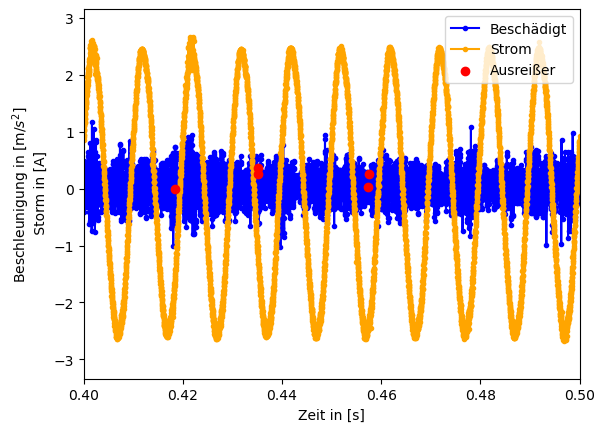

#######################_Anzahl =  211


1970-01-01 00:00:00.000000000    False
1970-01-01 00:00:00.000015625    False
1970-01-01 00:00:00.000031250    False
1970-01-01 00:00:00.000046875    False
1970-01-01 00:00:00.000062500    False
dtype: bool

In [109]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor

time = pd.to_datetime(lx,unit="s")


ds1 = pd.DataFrame(index=time,data={"healthy":Y1,"broken":Z1})
ds2 = pd.DataFrame(index=time,data={"healthy":Y2,"broken":Z2})
ds3 = pd.DataFrame(index=time,data={"healthy":Y3,"broken":Z3})
ds4 = pd.DataFrame(index=time,data={"healthy":Y4,"broken":Z4})


outlier_detector = OutlierDetector(LocalOutlierFactor(contamination="auto"))

anomalies1 = outlier_detector.fit_detect(ds1)
anomalies2 = outlier_detector.fit_detect(ds2)
anomalies3 = outlier_detector.fit_detect(ds3)
anomalies4 = outlier_detector.fit_detect(ds4)
#anomalies = anomalies.dropna()

#ds1 = ds1["healthy"]
#ds2 = ds2["healthy"]
#ds3 = ds3["healthy"]
#ds4 = ds4["healthy"]


aa = myplotmulti(lx,ds4,anomalies1)
print("#######################_Anzahl = ",aa)



""""
sns.set(rc= {"figure.figsize": (10,8)})
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
ax1.plot(lx,YData1,marker=".",color="green",label="Beschädigung ir.")
ax2.plot(lx,median1,marker=".",color="blue",label = "Ausreißerbefreit median")
ax3.plot(lx,mean1,marker=".",color="violet",label = "Ausreißerbefreit mean")
plt.legend()
plt.show()
"""
anomalies1.head()



In [110]:
mean1,median1,nan = removeOutlier(lx,ds1,anomalies1,window = 1000)
mean2,median2,nan = removeOutlier(lx,ds2,anomalies2,window = 1000)
mean3,median3,nan = removeOutlier(lx,ds3,anomalies3,window = 1000)
mean4,median4,nan = removeOutlier(lx,ds4,anomalies4,window = 1000)

C:\Users\Poldy\AppData\Local\Temp\ipykernel_19480\2737648460.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataMean[i]=dataA[i]
C:\Users\Poldy\AppData\Local\Temp\ipykernel_19480\2737648460.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataMedian[i]=dataA[i]
C:\Users\Poldy\AppData\Local\Temp\ipykernel_19480\2737648460.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataNan[i] = dataA[i]
C:\Users\Poldy\AppData\Local

(20472, 8)


c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1

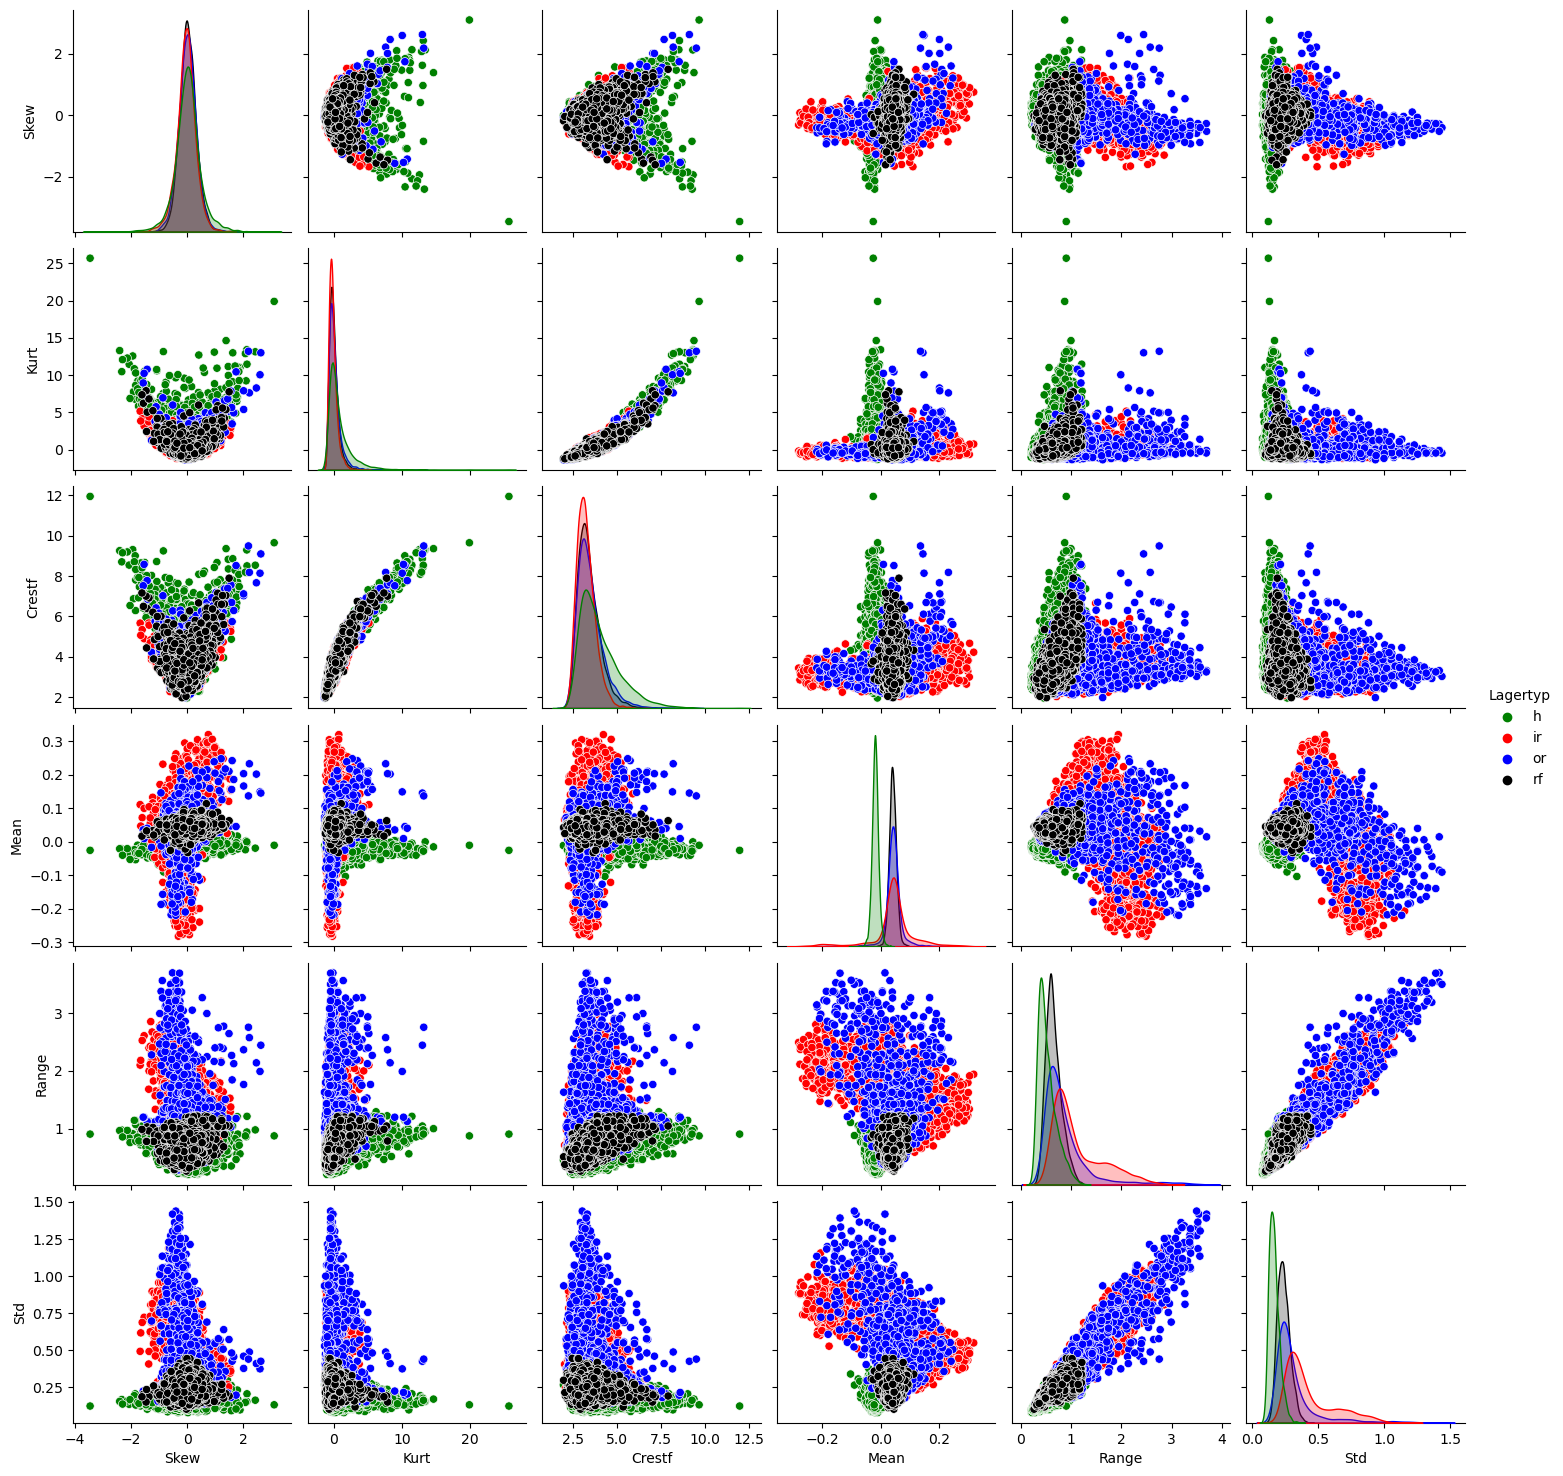

In [111]:
def makeFrame(df,wwin,label):
    ss = (int) (wwin/2)
    nn = "ssssssss"
    if label ==0:
        nn = "h"
    if label == 1:
        nn = "ir"
    if label == 2:
        nn = "or"
    if label == 3:
        nn = "rf"

    dfRange = df.abs().rolling(window=wwin,step=ss).max()-df.abs().rolling(window=wwin,step=ss).min()
    dfMean = df.rolling(window = wwin,step=ss).mean()
    dfStd = df.rolling(window= wwin,step=ss).std()
    dfSkew = df.rolling(window= wwin,step=ss).skew()
    dfKurt = df.rolling(window= wwin,step=ss).kurt()
    dfCrest = df.abs()
    dfCrest = dfCrest.rolling(window= wwin,step=ss).max()/df.abs().rolling(window = wwin,step=ss).mean()
    #dfCrest = dfCrest/dfMean.abs().mean()
    
    dfAll = pd.DataFrame(index = dfRange.index.values,data ={"Range": dfRange["data1"],"Mean":dfMean["data1"],"Std":dfStd["data1"],
                                                            "Skew": dfSkew["data1"],"Kurt": dfKurt["data1"],"Crestf": dfCrest["data1"],
                                                            "label":np.full(shape=len(dfRange),fill_value=label),
                                                            "Lagertyp":np.full(shape=len(dfRange),fill_value=nn)})
    dfAll.head()
    return dfAll



df1 = pd.DataFrame(index = lx, data = {"data1" : mean1})
df2 = pd.DataFrame(index = lx, data = {"data1" : mean2})
df3 = pd.DataFrame(index = lx, data = {"data1" : mean3})
df4 = pd.DataFrame(index = lx, data = {"data1" : mean4})



win = 100

dfHealth2 = makeFrame(df1,win,0)
dfBrokeI2 = makeFrame(df2,win,1)
dfBrokeO2 = makeFrame(df3,win,2)
dfReal2 = makeFrame(df4,win,3)


#dfAll = pd.concat([dfHealth,dfBrokeI])
#dfAll = pd.concat([dfHealth,dfBrokeI,dfBrokeO])

dfAll1 = pd.concat([dfHealth2,dfBrokeI2,dfBrokeO2,dfReal2])
dfAll1 = dfAll1.dropna()
print(dfAll1.shape)

sns.pairplot(dfAll1, hue = 'Lagertyp', vars = ['Skew', 'Kurt', 'Crestf', 'Mean',"Range","Std"], palette = ["green","red","blue","black"] )


Our model accuracy with k=3 is: 0.6502540054708871
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1233
           1       0.67      0.72      0.69      1312
           2       0.45      0.15      0.23      1242
           3       0.51      0.77      0.61      1331

    accuracy                           0.65      5118
   macro avg       0.64      0.65      0.62      5118
weighted avg       0.64      0.65      0.62      5118



<Figure size 500x500 with 0 Axes>

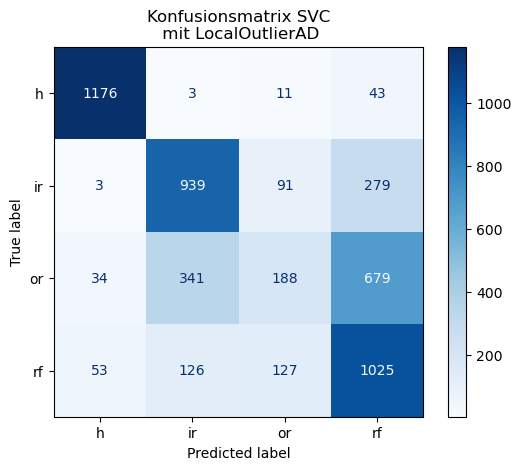

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X = dfAll1[['Range', 'Mean', 'Std','Kurt','Skew','Crestf']]
y = dfAll1['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


clf = SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred
print(f'Our model accuracy with k=3 is: {clf.score(X_test, y_test)}')

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_pred,cmap=plt.cm.Blues,
                                        display_labels=["h","ir","or","rf"],xticks_rotation="horizontal",ax=ax)
_ = ax.set_title(
    f"Konfusionsmatrix {clf.__class__.__name__}\n mit LocalOutlierAD"
)
plt.grid(visible=False)
print(classification_report(y_test, y_pred))

Our model accuracy with k=3 is: 0.5590074247753029
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1233
           1       0.56      0.67      0.61      1312
           2       0.34      0.29      0.32      1242
           3       0.47      0.39      0.43      1331

    accuracy                           0.56      5118
   macro avg       0.54      0.56      0.55      5118
weighted avg       0.54      0.56      0.55      5118



<Figure size 500x500 with 0 Axes>

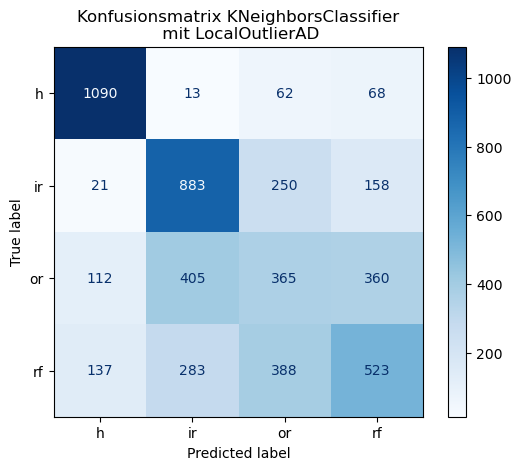

In [113]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred
print(f'Our model accuracy with k=3 is: {clf.score(X_test, y_test)}')

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_pred,cmap=plt.cm.Blues,
                                        display_labels=["h","ir","or","rf"],xticks_rotation="horizontal",ax=ax)
_ = ax.set_title(
    f"Konfusionsmatrix {clf.__class__.__name__}\n mit LocalOutlierAD"
)
plt.grid(visible=False)
print(classification_report(y_test, y_pred))

Our model accuracy with k=3 is: 0.6527940601797577
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1233
           1       0.61      0.77      0.68      1312
           2       0.38      0.06      0.11      1242
           3       0.52      0.78      0.62      1331

    accuracy                           0.65      5118
   macro avg       0.62      0.65      0.60      5118
weighted avg       0.62      0.65      0.60      5118



<Figure size 500x500 with 0 Axes>

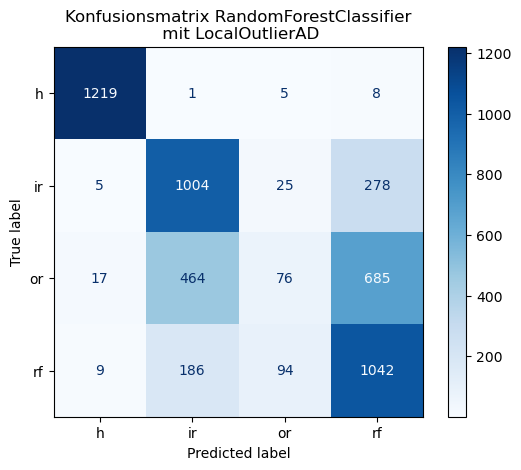

In [114]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred
print(f'Our model accuracy with k=3 is: {clf.score(X_test, y_test)}')

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_pred,cmap=plt.cm.Blues,
                                        display_labels=["h","ir","or","rf"],xticks_rotation="horizontal",ax=ax)
_ = ax.set_title(
    f"Konfusionsmatrix {clf.__class__.__name__}\n mit LocalOutlierAD"
)
plt.grid(visible=False)
print(classification_report(y_test, y_pred))